In [1]:
housing <- read.csv("landdata-states.csv")
head(housing[1:5])

State region Date    Home.Value Structure.Cost
1 AK    West   2010.25 224952     160599        
2 AK    West   2010.50 225511     160252        
3 AK    West   2009.75 225820     163791        
4 AK    West   2010.00 224994     161787        
5 AK    West   2008.00 234590     155400        
6 AK    West   2008.25 233714     157458

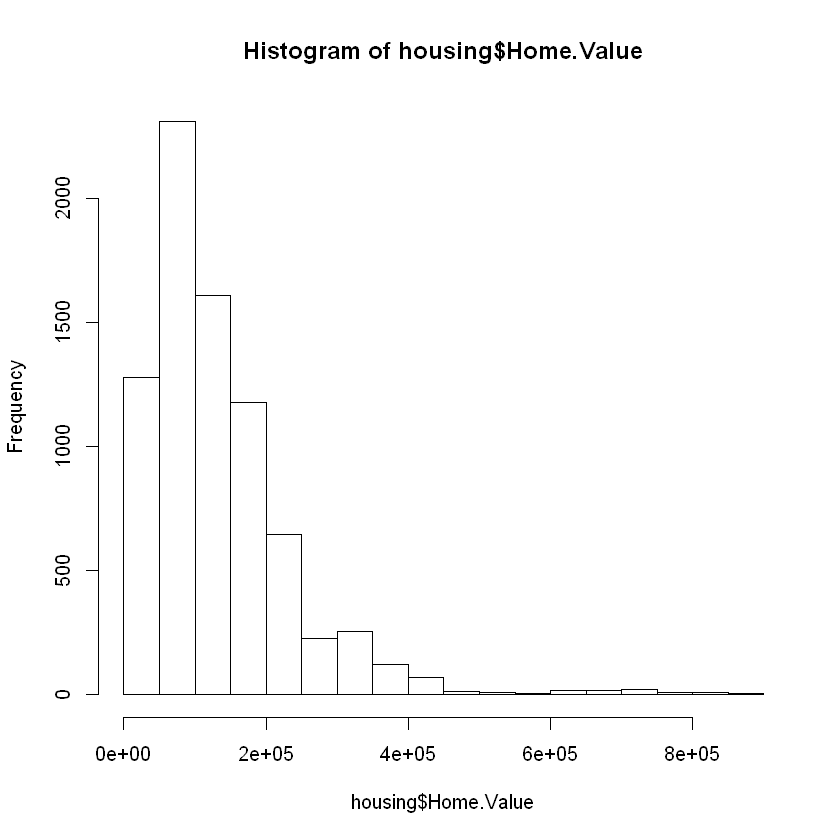

In [2]:
hist(housing$Home.Value)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


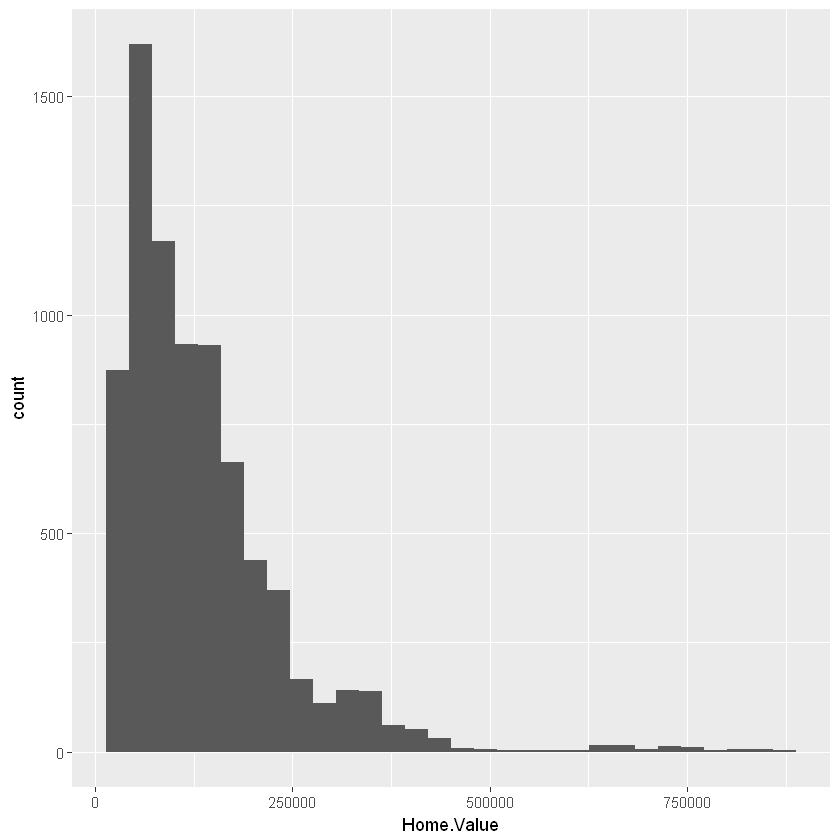

In [3]:
library(ggplot2)
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

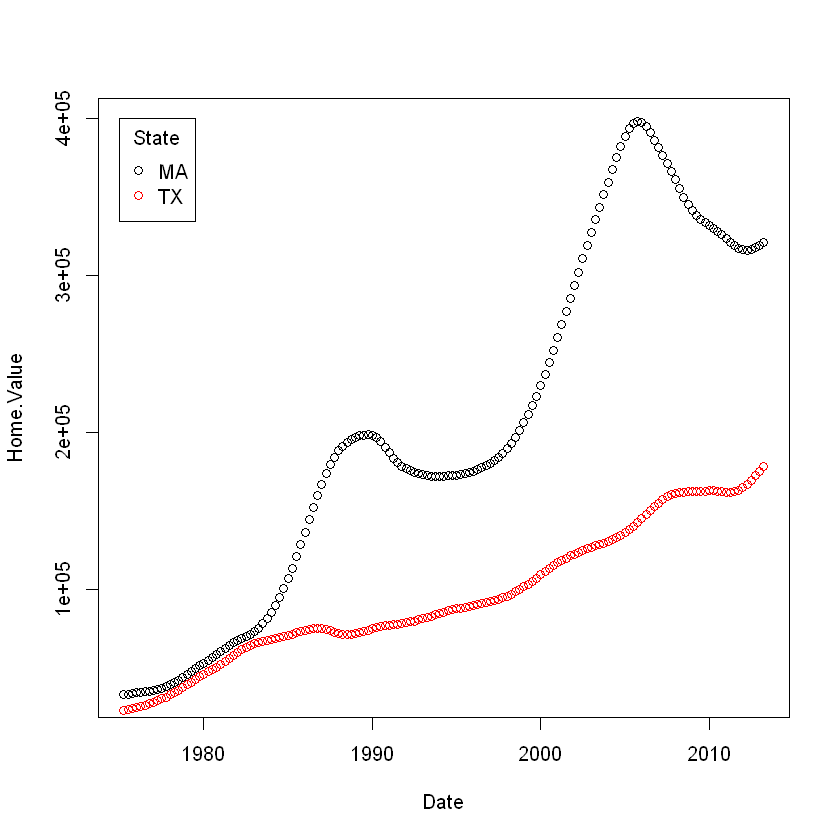

In [4]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

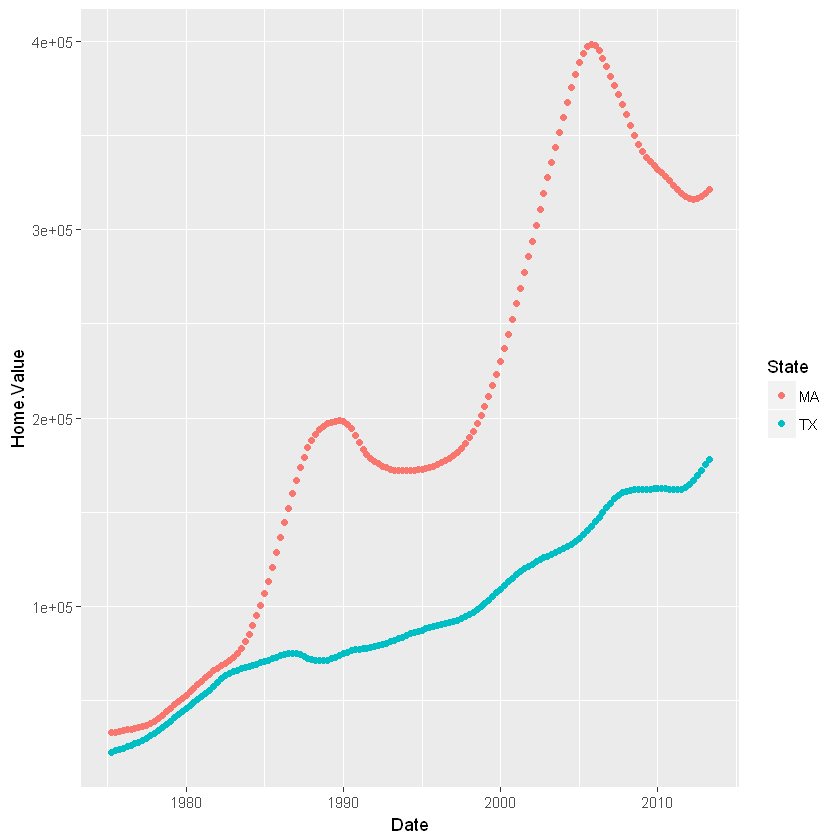

In [5]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

In [6]:
help.search("geom_", package = "ggplot2")

starting httpd help server ... done


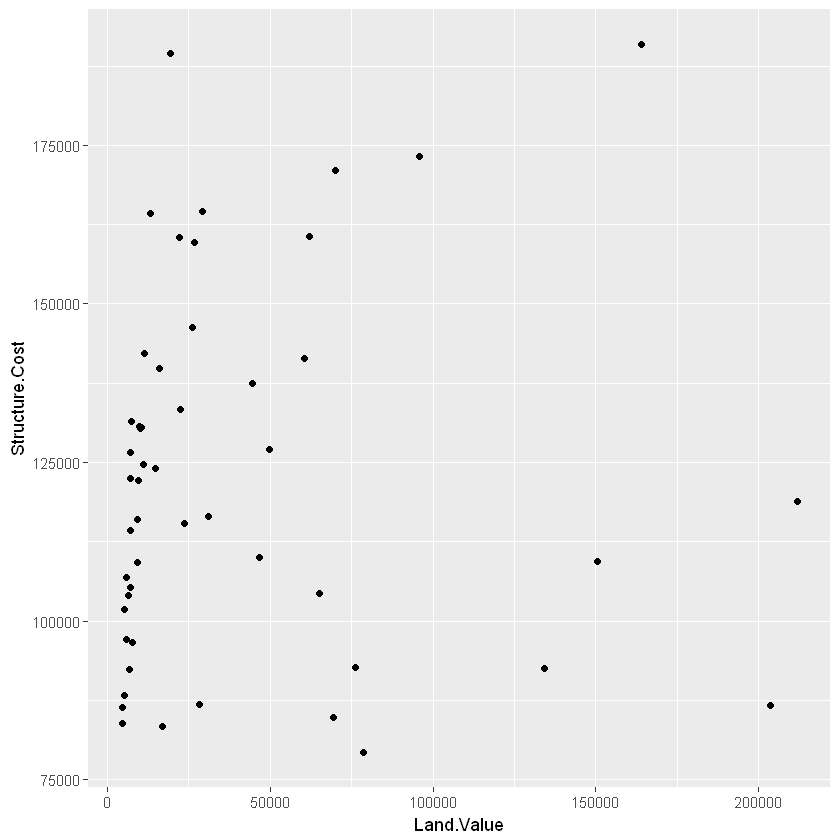

In [7]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

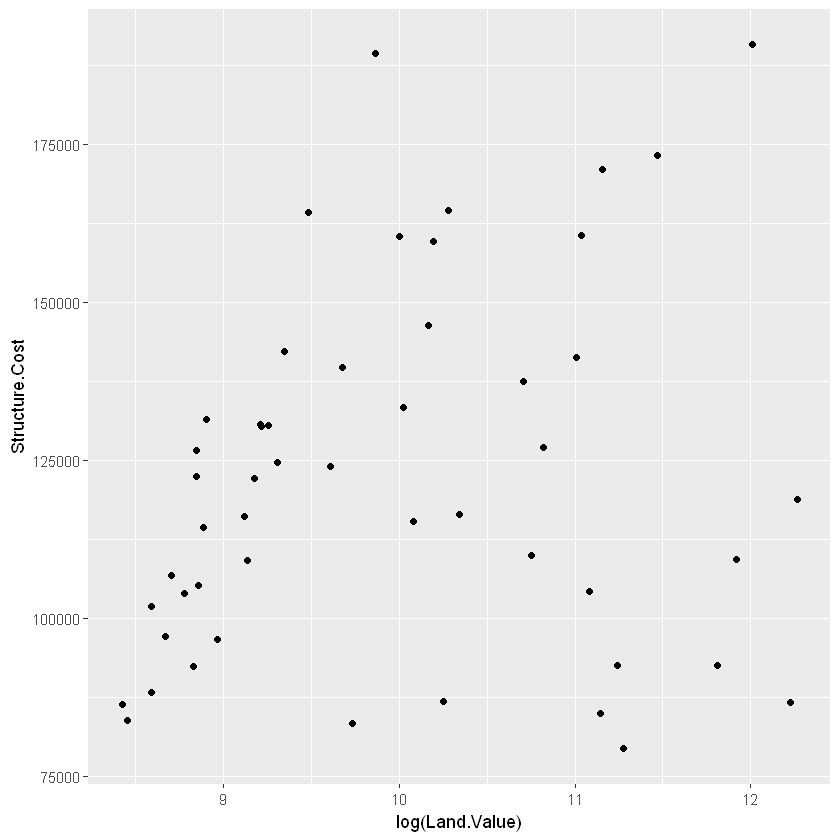

In [8]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

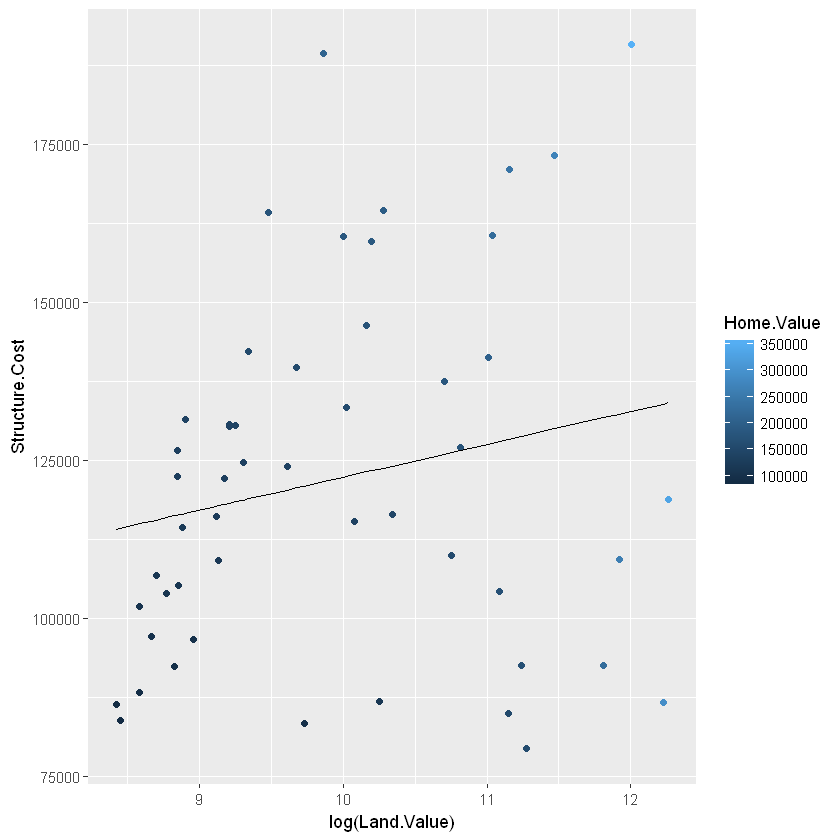

In [9]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

`geom_smooth()` using method = 'loess'


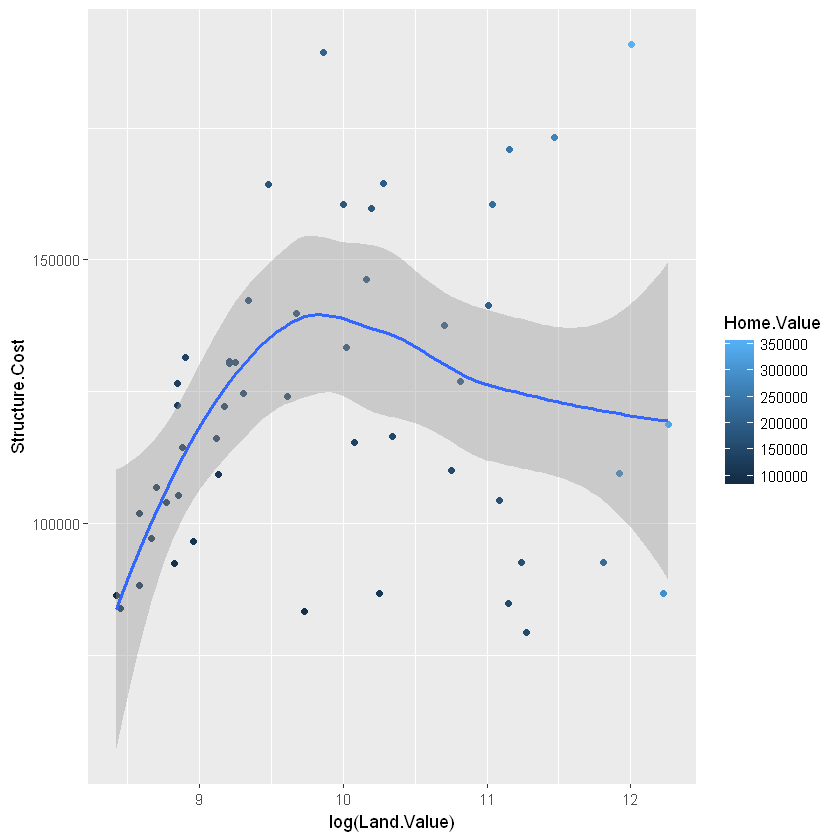

In [10]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()

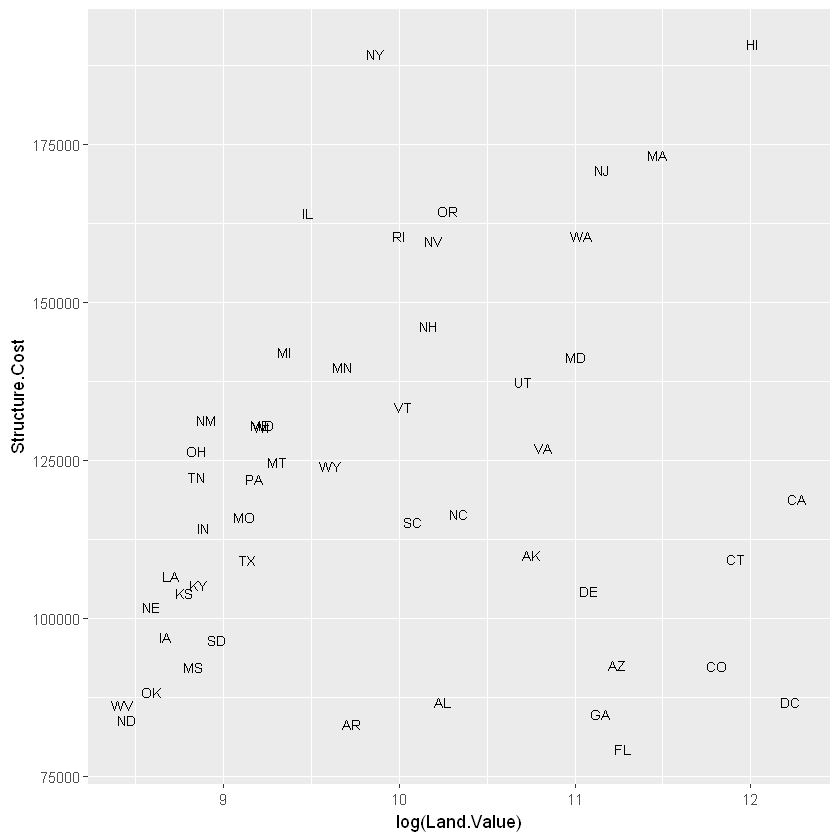

In [11]:
p1 + 
  geom_text(aes(label=State), size = 3)

Warning message:
"package 'ggrepel' was built under R version 3.3.3"

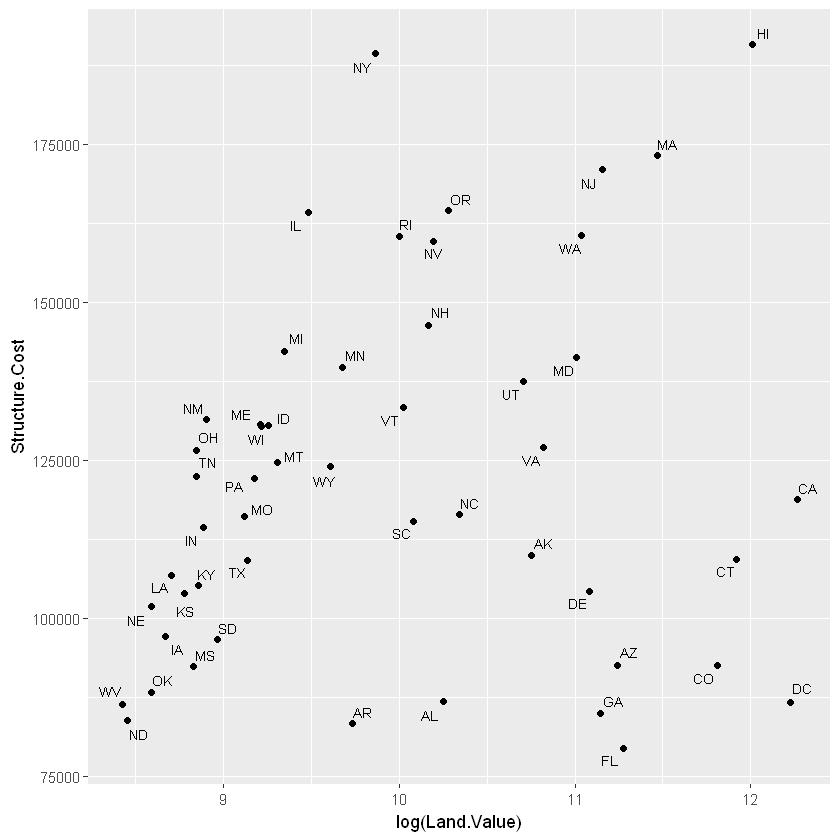

In [12]:
#install.packages("ggrepel",repos="https://cran.r-project.org/") 
library("ggrepel")
p1 + 
  geom_point() + 
  geom_text_repel(aes(label=State), size = 3)

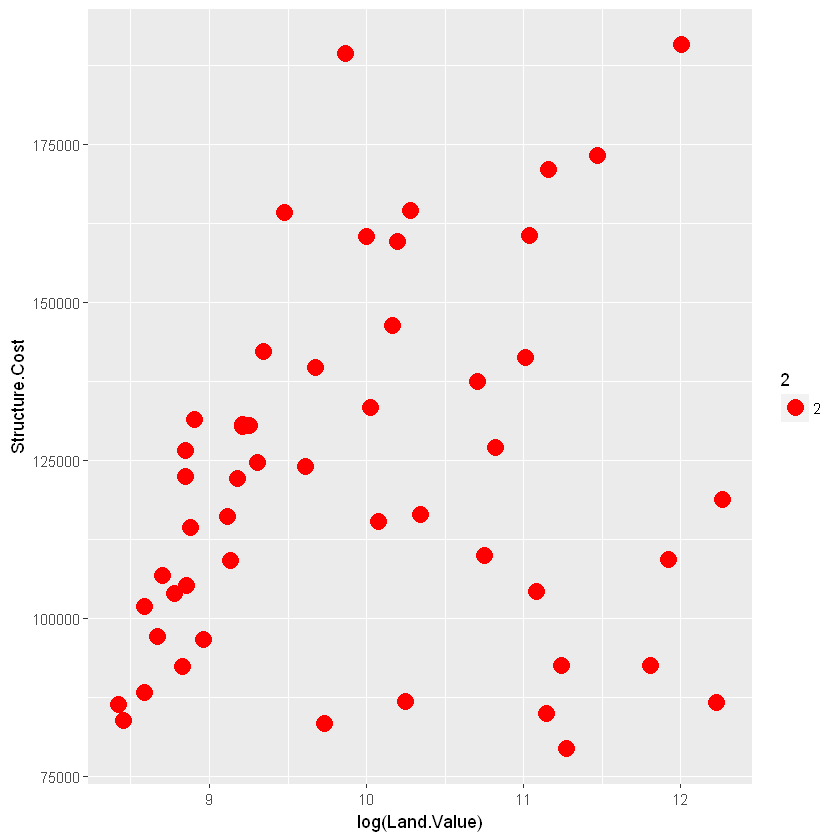

In [13]:
p1 +
  geom_point(aes(size = 2),
             color="red") 

Warning message:
"Removed 1 rows containing missing values (geom_point)."

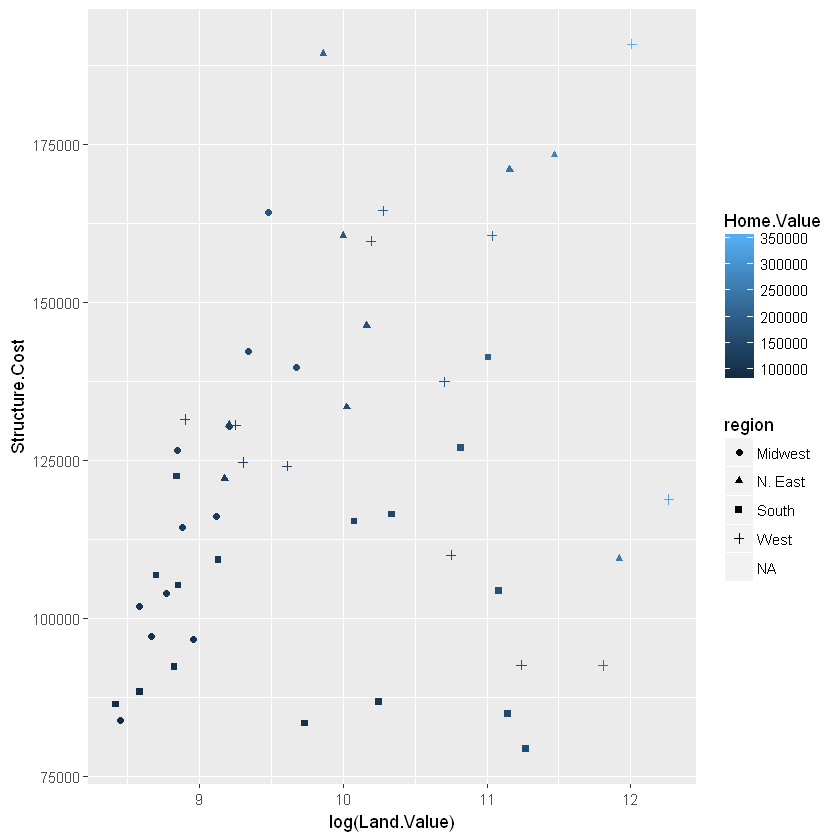

In [14]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

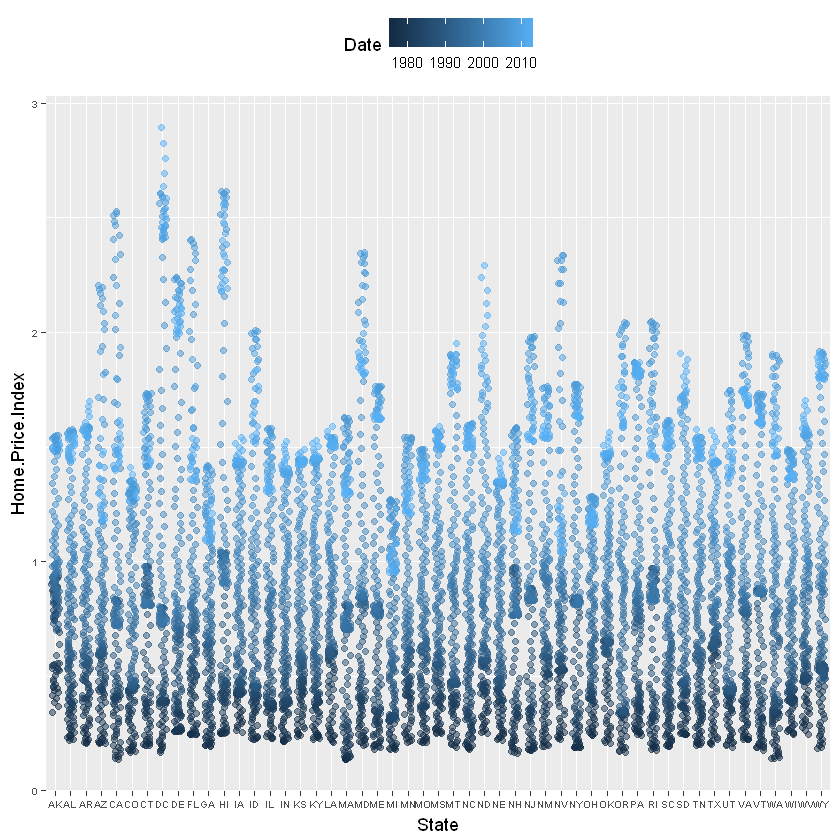

In [15]:
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

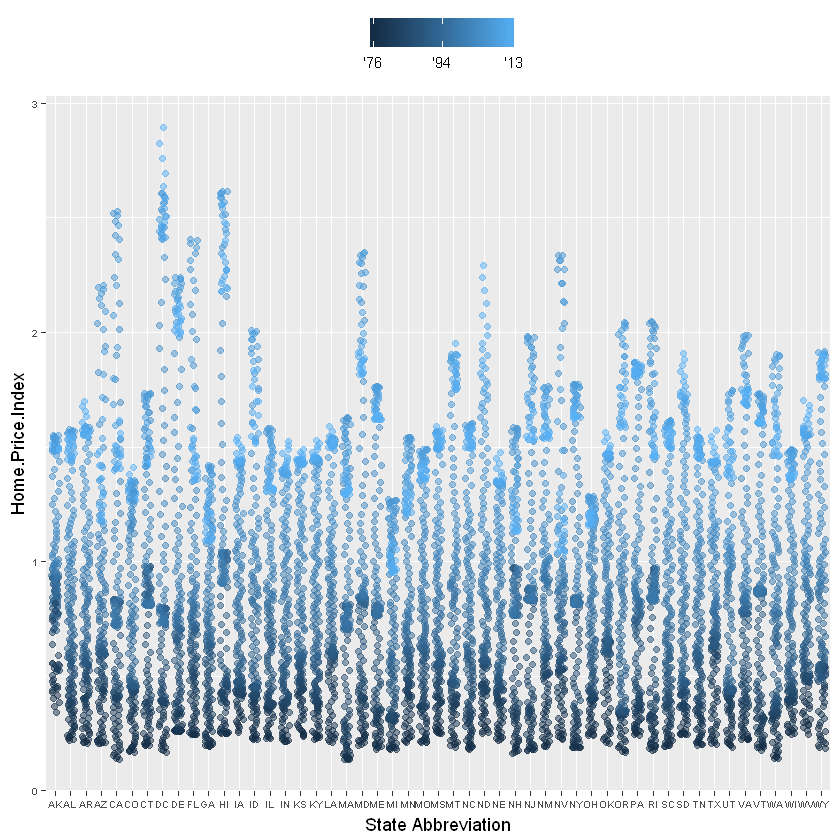

In [16]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

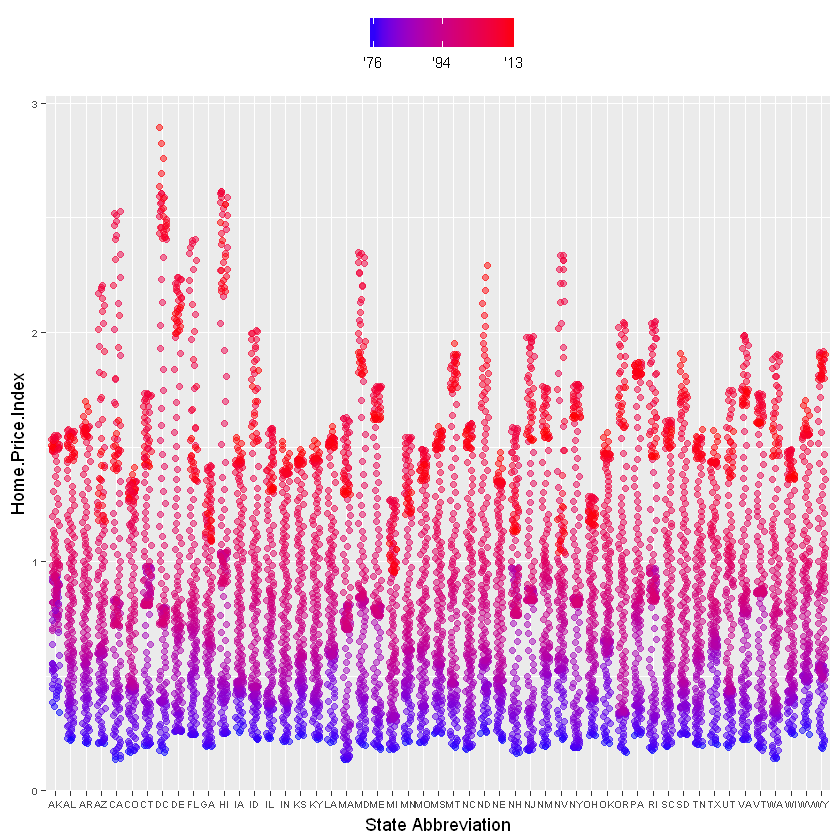

In [17]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

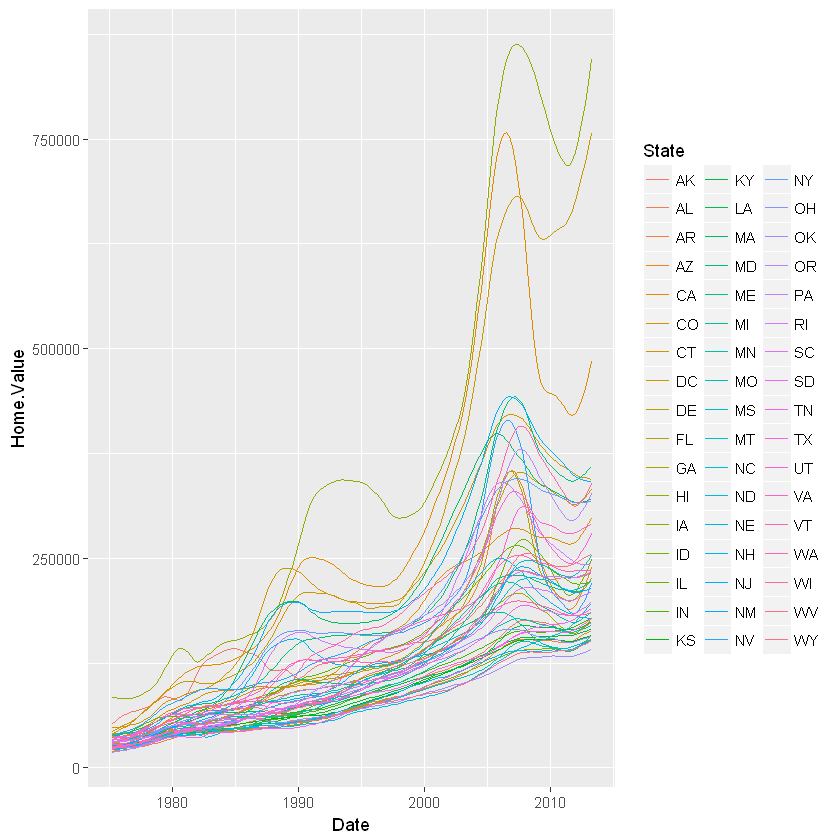

In [18]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

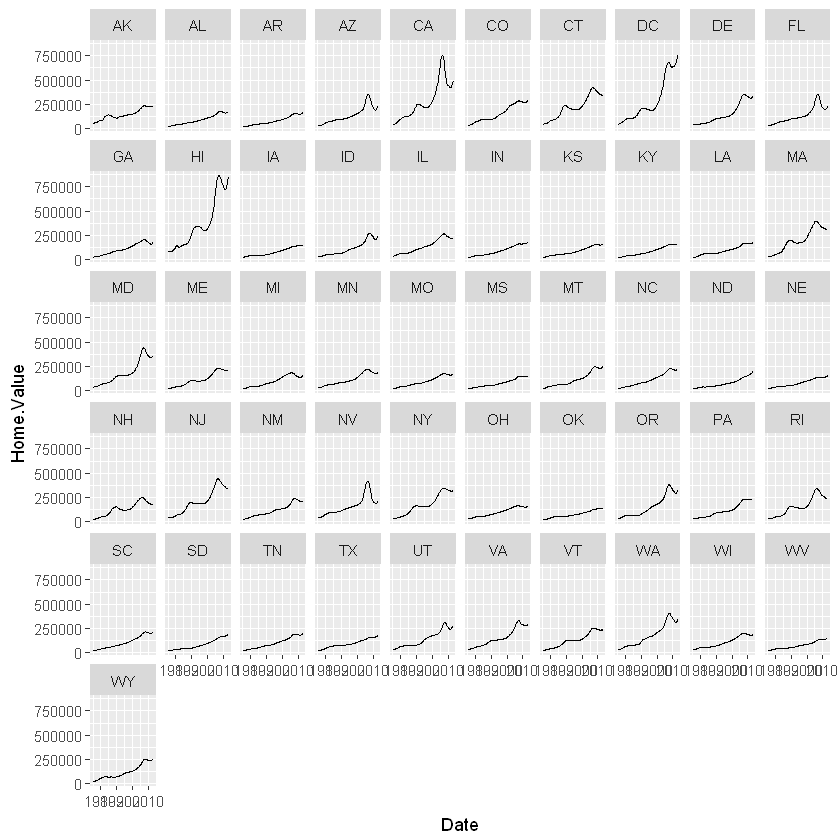

In [19]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

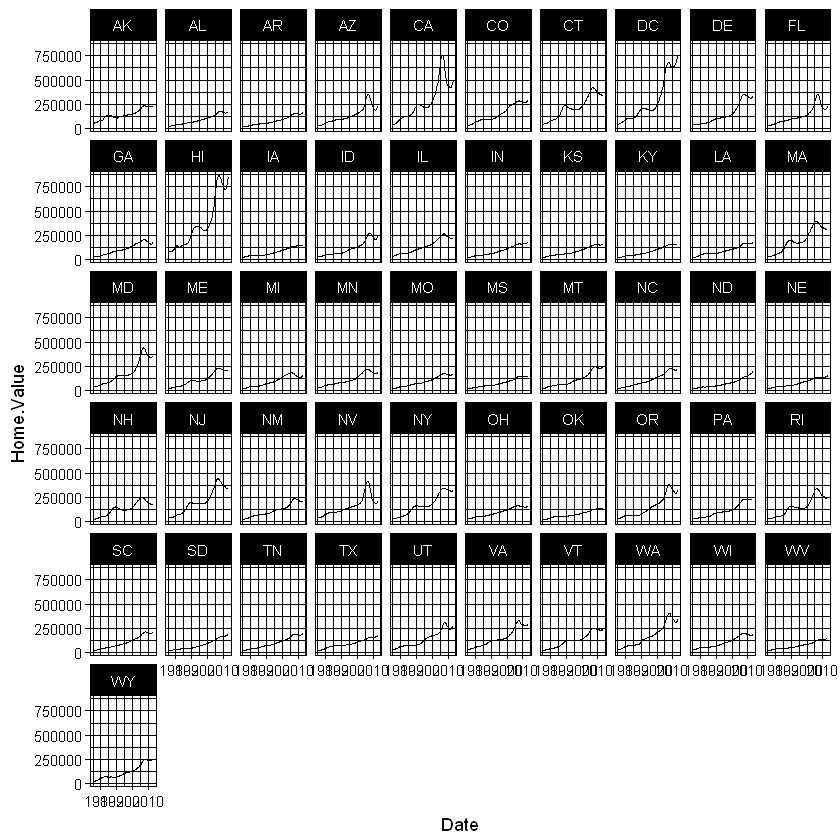

In [20]:
p5 + theme_linedraw()

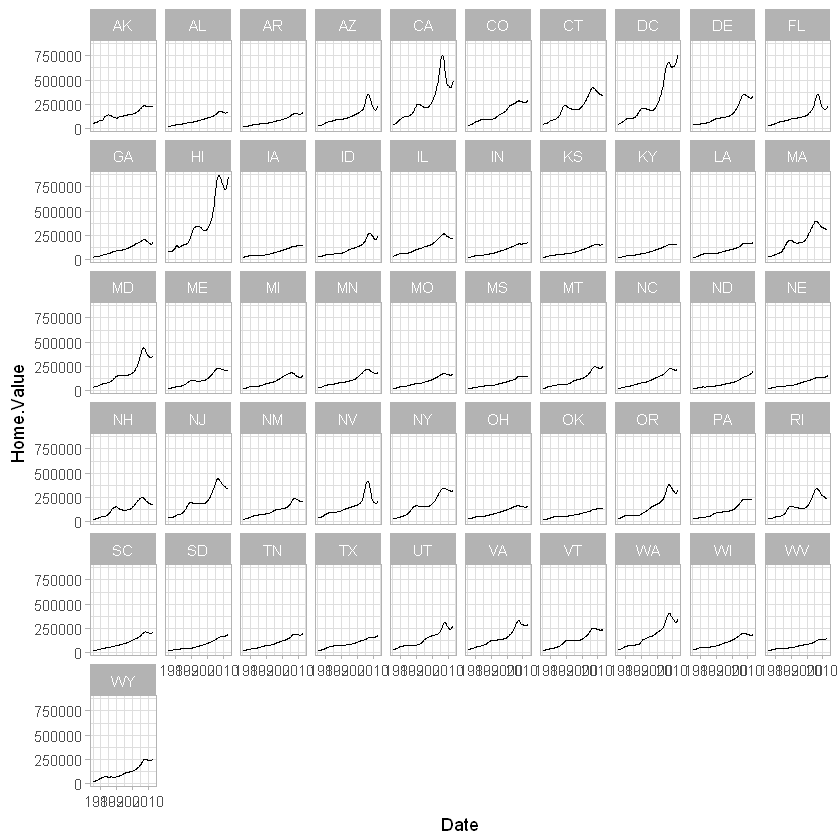

In [21]:
p5 + theme_light()

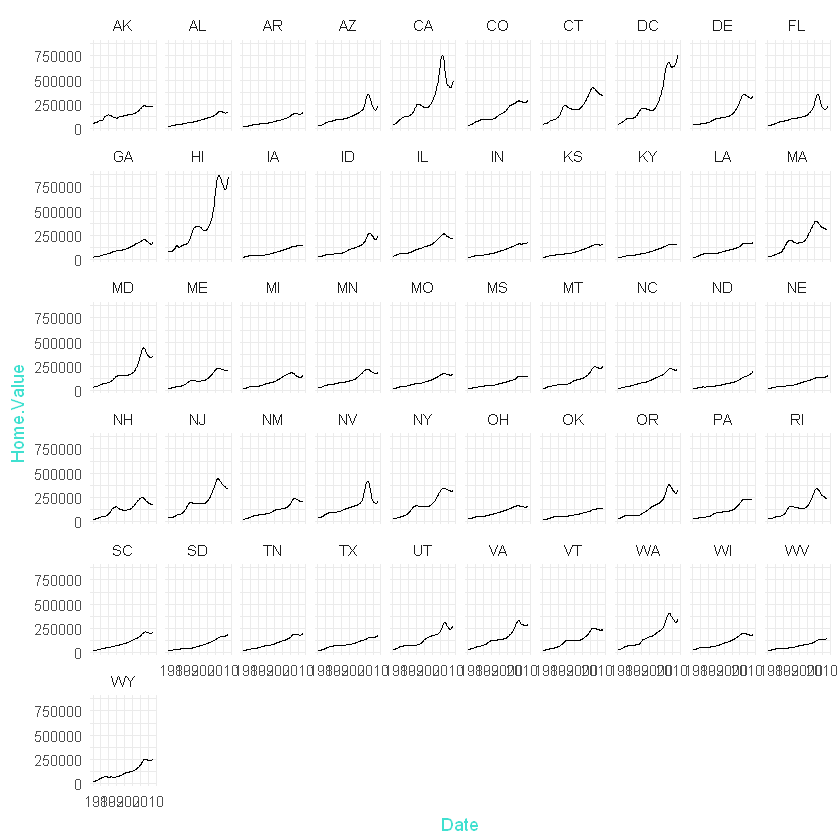

In [22]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

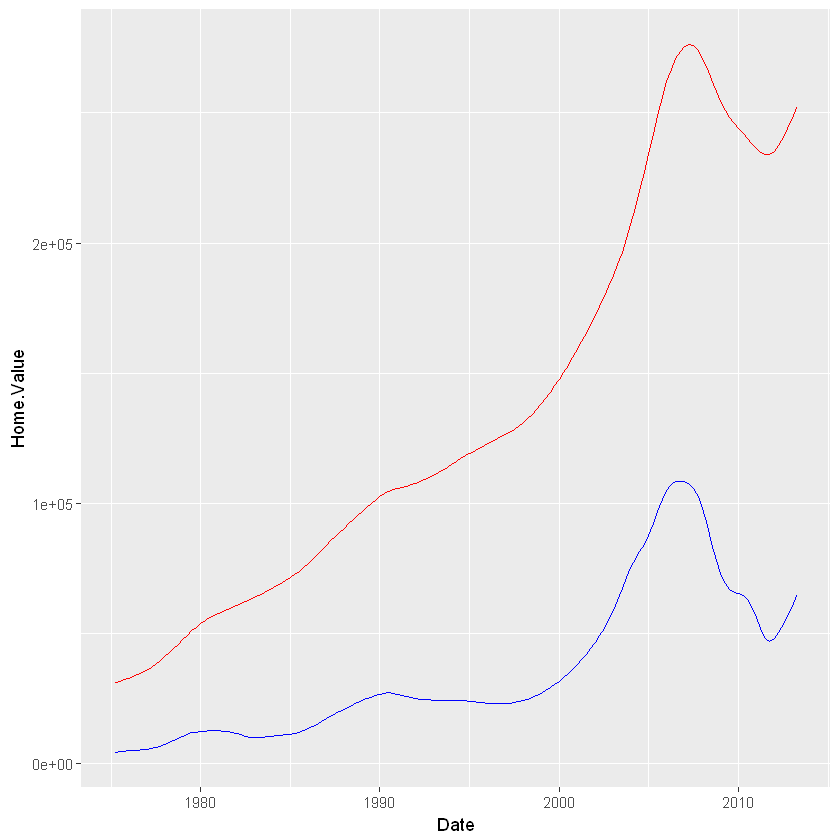

In [23]:
housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
ggplot(housing.byyear,
       aes(x=Date)) +
  geom_line(aes(y=Home.Value), color="red") +
  geom_line(aes(y=Land.Value), color="blue")

Warning message:
"package 'tidyr' was built under R version 3.3.3"

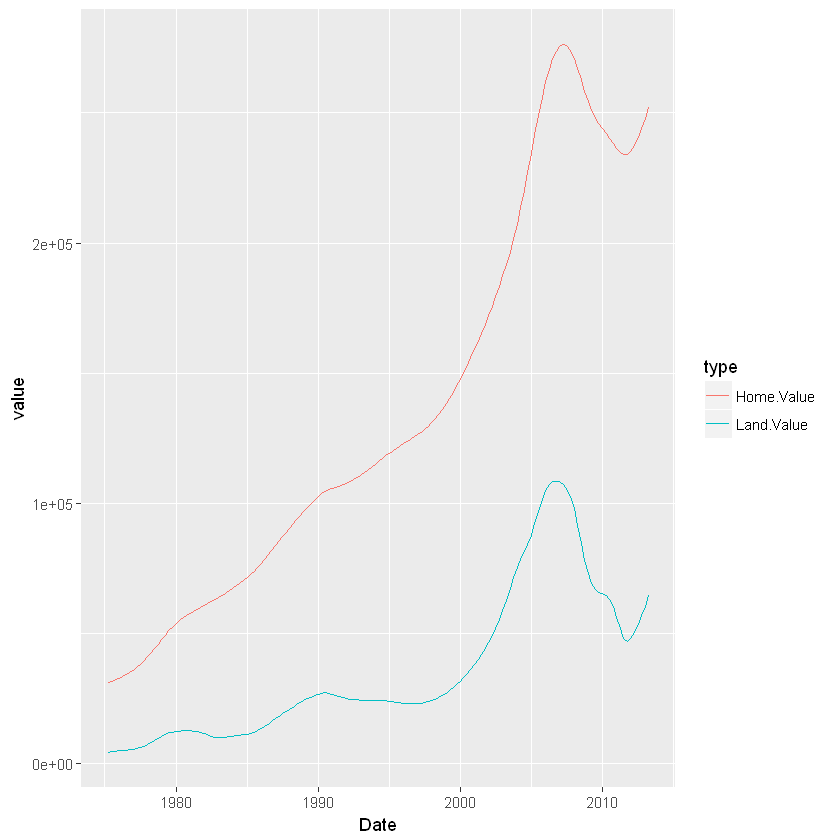

In [24]:
#install.packages("tidyr",repos="https://cran.r-project.org/")
library(tidyr)
home.land.byyear <- gather(housing.byyear,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()